# Understanding ISS code
created 2025-01-08

In [1]:
import pandas as pd
from pathlib import Path

In [16]:
dataAF = pd.read_csv(Path("../ressources//af_structures.csv"))
dataSolved = pd.read_csv(Path("../ressources//solved_structures.csv"))
predictionAF = pd.read_excel(Path("../ressources/ISS AF_DMI_structures/AF_prediction_randomized_DMI_results.xlsx"))

# Filtering the original dataset for "known minimal" and "random minimal"
predictionAF_filtered = predictionAF[predictionAF['num_mutation_in_motif'].isin(['known minimal', 'random minimal'])]

# Normalizing the structure_file column (remove ".pdb" to match model_id)
dataAF['model_id'] = dataAF['file'].str.replace('.pdb', '')
dataAF.rename(columns={'structure_name': 'prediction_name'}, inplace=True)

# Merging the datasets on prediction_name and model_id
merged_df = pd.merge(predictionAF_filtered, dataAF, 
                     left_on=['prediction_name', 'model_id'], 
                     right_on=['prediction_name', 'model_id'], 
                     how='inner')

merged_df.fillna(0, inplace=True)

# Dropping unnecessary columns if needed (e.g., structure_file if model_id is enough)
merged_df = merged_df.drop(columns=['file'])

# Previewing the merged dataset
print("Merged dataset preview:")
merged_df

Merged dataset preview:


,prediction_name,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,...,num_chainB_intf_res,num_res_res_contact,num_atom_atom_contact,num_mutation_in_motif,label,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,0.162263,3.311542,...,5,23,208,known minimal,1,9,0,613.651,6.063,0
1,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,0.145001,3.395909,...,5,20,190,known minimal,1,9,0,580.310,6.083,0
2,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,0.116743,6.166772,...,5,27,237,known minimal,1,10,0,662.104,6.072,3
3,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,0.036380,16.713730,...,3,11,83,known minimal,1,2,0,398.498,5.417,0
4,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,0.029969,18.696838,...,3,9,108,known minimal,1,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,312,4,ranked_0,0.680386,94.414615,40.943334,84.388750,0.038101,6.028506,...,3,14,60,random minimal,0,0,0,585.345,6.220,25
1328,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,312,4,ranked_1,0.674241,89.304167,38.329999,79.109334,0.062945,6.435163,...,3,15,108,random minimal,0,1,2,567.373,5.664,23
1329,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,312,4,ranked_2,0.670584,90.133333,37.503333,76.975833,0.055375,6.313079,...,3,11,117,random minimal,0,3,2,589.111,5.396,12
1330,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,312,4,ranked_3,0.635099,87.795000,36.423333,77.520667,0.043403,6.988881,...,3,14,110,random minimal,0,4,2,584.961,6.929,9


In [17]:
# NEXT STEPS

# Data Preproccessing - not necessary for this data but I did it anyway

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = merged_df.drop(columns=['prediction_name', 'label', 'num_mutation_in_motif', 'model_id'])
y = merged_df['label']

# Handling any missing values by filling with the mean of each column
X.fillna(X.mean(), inplace=True)

# Scaling the features (important for some models like SVM, Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output the shapes of the training and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (1065, 17)
Test set shape: (267, 17)


In [18]:
X

,chainA_length,chainB_length,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,num_res_res_contact,num_atom_atom_contact,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,312,5,0.887117,96.107999,77.495999,91.454999,0.162263,3.311542,15,5,23,208,9,0,613.651,6.063,0
1,312,5,0.871984,95.793846,73.986000,89.736111,0.145001,3.395909,13,5,20,190,9,0,580.310,6.083,0
2,312,5,0.760784,95.547501,57.906001,86.585239,0.116743,6.166772,16,5,27,237,10,0,662.104,6.072,3
3,312,5,0.413662,94.646667,21.510000,76.362500,0.036380,16.713730,9,3,11,83,2,0,398.498,5.417,0
4,312,5,0.359078,94.830001,19.753333,72.307001,0.029969,18.696838,7,3,9,108,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,312,4,0.680386,94.414615,40.943334,84.388750,0.038101,6.028506,13,3,14,60,0,0,585.345,6.220,25
1328,312,4,0.674241,89.304167,38.329999,79.109334,0.062945,6.435163,12,3,15,108,1,2,567.373,5.664,23
1329,312,4,0.670584,90.133333,37.503333,76.975833,0.055375,6.313079,9,3,11,117,3,2,589.111,5.396,12
1330,312,4,0.635099,87.795000,36.423333,77.520667,0.043403,6.988881,12,3,14,110,4,2,584.961,6.929,9


NameError: name 'X' is not defined

In [2]:
l1 = X["model_confidence"][y == 1]
l0 = X["model_confidence"][y == 0]
plt.ecdf(l1, label="1")
plt.ecdf(l0, label="0")
plt.legend()
plt.show()
plt.hist(l0, label="0")
plt.hist(l1, label="1")

plt.legend()
plt.show()

NameError: name 'X' is not defined

In [19]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1327    0
1328    0
1329    0
1330    0
1331    0
Name: label, Length: 1332, dtype: int64

In [20]:
X_scaled

array([[ 0.85481903, -0.78870016,  1.32239398, ..., -0.70245723,
         0.8126174 , -1.39781448],
       [ 0.85481903, -0.78870016,  1.25034915, ..., -0.78586501,
         0.8286411 , -1.39781448],
       [ 0.85481903, -0.78870016,  0.7209608 , ..., -0.58124439,
         0.81982807, -1.30803009],
       ...,
       [ 0.85481903, -1.01688187,  0.29154624, ..., -0.76384792,
         0.27822709, -1.03867691],
       [ 0.85481903, -1.01688187,  0.12261168, ..., -0.7742298 ,
         1.50644351, -1.1284613 ],
       [ 0.85481903, -1.01688187, -0.07905945, ..., -0.85851316,
         1.25727501, -0.82917999]])

In [21]:
X_train

array([[-0.91997921,  0.1240267 , -0.94919363, ...,  0.20631257,
        -0.18646014,  0.30808899],
       [-1.01812473, -0.10415502,  1.27059555, ..., -0.02862063,
        -0.2946201 ,  1.17600479],
       [-0.68279419, -0.78870016, -0.36652201, ..., -0.64240493,
        -0.3370829 ,  1.17600479],
       ...,
       [ 0.19233674, -0.56051844, -0.31793286, ..., -0.531619  ,
         1.44154753, -0.70946747],
       [-0.68279419, -0.56051844,  0.01116983, ...,  0.2624873 ,
        -0.24254308,  0.6073703 ],
       [-0.35564244,  1.03675355, -1.09751282, ...,  1.84158388,
        -0.97162132,  1.17600479]])

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Test Accuracy: 0.8544776119402985
AUC-ROC Score: 0.9324414715719063
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       130
           1       0.93      0.78      0.85       138

    accuracy                           0.85       268
   macro avg       0.86      0.86      0.85       268
weighted avg       0.87      0.85      0.85       268



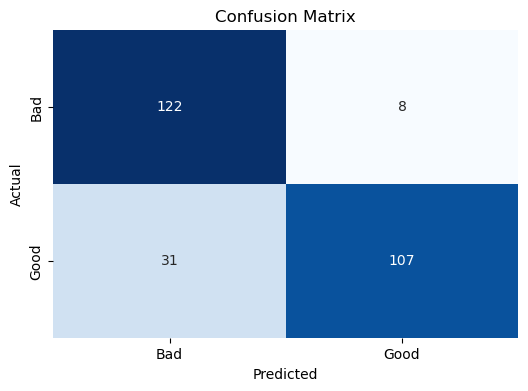

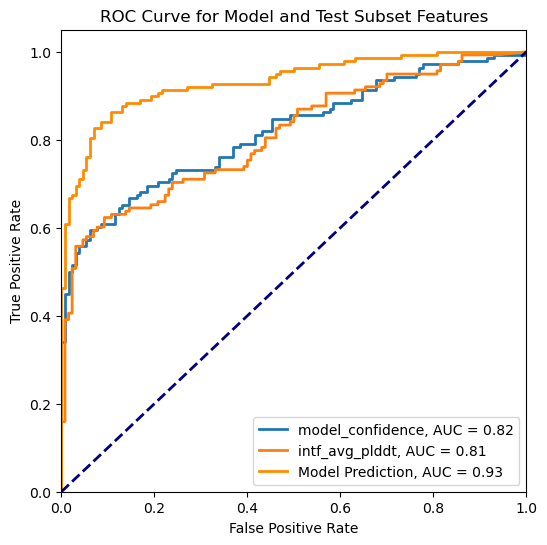

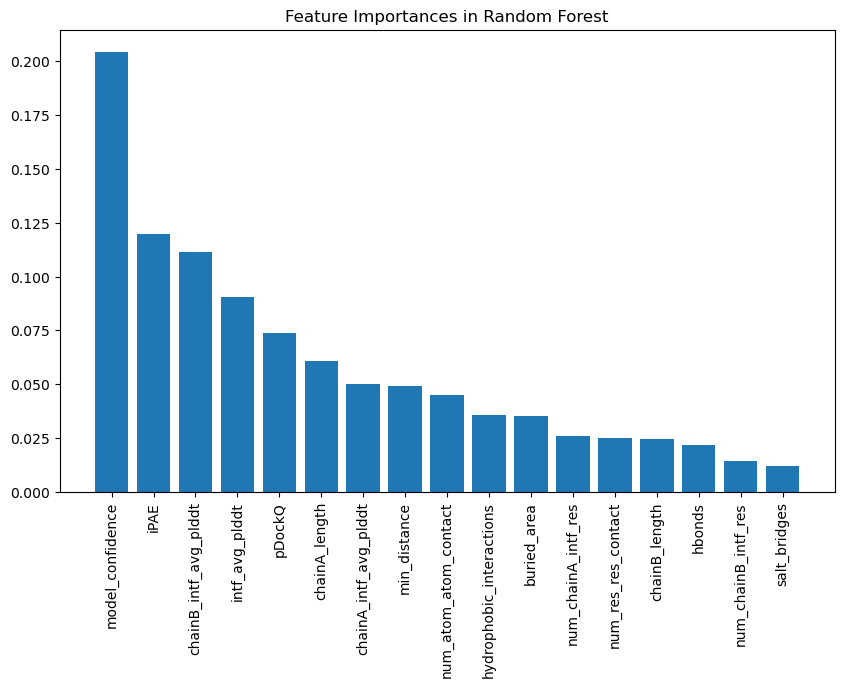

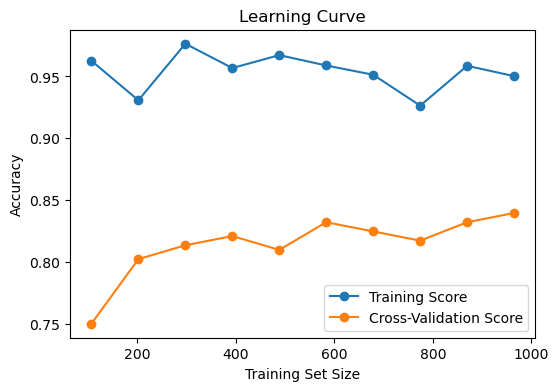

In [22]:
# Machine Learning Part and Results


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn import metrics


final_df = merged_df.copy()

# Separating features (X) and target (y)
X = final_df.drop(columns=['label', 'prediction_name', 'num_mutation_in_motif', 'model_id'])
y = final_df['label']

# Data Augmentation with SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split on resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initializing the models with early stopping for Gradient Boosting
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42, n_iter_no_change=5, validation_fraction=0.1)

# Combining the models using a Voting Classifier (Blending)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('gb', gb_model)
], voting='soft')

# Defining new parameter grid for tuning the voting classifier
param_grid = {
    'rf__n_estimators': [150, 200, 250],         # Slightly increase n_estimators for Random Forest
    'rf__max_depth': [15, 20, None],             # Relax max_depth slightly
    'rf__min_samples_split': [6, 8, 10],         # Maintain higher min_samples_split for better generalization
    'rf__min_samples_leaf': [4, 5],              # Keep min_samples_leaf higher, but relax a bit

    'gb__n_estimators': [100, 150],              # Slightly fewer boosting iterations for GB to avoid overfitting
    'gb__learning_rate': [0.01, 0.02, 0.05],     # Fine-tune smaller learning rate for smoother updates
    'gb__max_depth': [3, 4, 5],                  # Keep the max depth smaller
    'gb__min_samples_split': [6, 8],             # Allow larger samples for splitting to generalize better
    'gb__min_samples_leaf': [4, 5],              # Keep larger leaves for GB
    'gb__subsample': [0.8, 0.9]                  # Subsample for Gradient Boosting to prevent overfitting
}

# Stratified K-Fold for better validation
stratified_kfold = StratifiedKFold(n_splits=10)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=voting_clf, param_distributions=param_grid, cv=stratified_kfold,
                                   n_iter=20, scoring='accuracy', n_jobs=-1, verbose=2)

# Fitting the model
random_search.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, random_search.best_estimator_.predict_proba(X_test)[:, 1])

print(f"Test Accuracy: {accuracy}")
print(f"AUC-ROC Score: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualization 

# Confusion Matrix with "Bad" and "Good" labels
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve with additional test subset features and machine learning results
fig, ax = plt.subplots(figsize=(6, 6))

# Computing ROC for model confidence
fpr, tpr, _ = roc_curve(y_test, X_test['model_confidence'])
roc_auc_value = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=2, label=f'model_confidence, AUC = {roc_auc_value:.2f}')

# Computing ROC for intf_avg_plddt
fpr, tpr, _ = roc_curve(y_test, X_test['intf_avg_plddt'])
roc_auc_value = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=2, label=f'intf_avg_plddt, AUC = {roc_auc_value:.2f}')

# Computing ROC for the model's prediction probabilities (Voting Classifier results)
y_proba = random_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=2, label=f'Model Prediction, AUC = {roc_auc_value:.2f}', color='darkorange')

# Configuring the plot
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Model and Test Subset Features')
ax.legend(loc="lower right")
plt.show()


# Configuring the plot
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Model and Test Subset Features')
ax.legend(loc="lower right")
plt.show()



# Feature Importance (for Random Forest model in Voting Classifier)
rf_best = random_search.best_estimator_.named_estimators_['rf']
importances_rf = rf_best.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices_rf], rotation=90)
plt.show()

# Learning Curve
train_sizes = np.linspace(0.1, 0.9, 10)  # This gives proportions from 0.1 to 0.9 (as 1.0 can lead to errors)
train_scores = []
cv_scores = []
for size in train_sizes:
    # Split the training data according to the proportion size
    X_train_size, _, y_train_size, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Fit the best estimator model found in RandomizedSearchCV
    random_search.best_estimator_.fit(X_train_size, y_train_size)
    
    # Calculate training accuracy and validation accuracy
    train_scores.append(random_search.best_estimator_.score(X_train_size, y_train_size))
    cv_scores.append(random_search.best_estimator_.score(X_test, y_test))

# Plotting the learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes * len(X_train), train_scores, label='Training Score', marker='o')
plt.plot(train_sizes * len(X_train), cv_scores, label='Cross-Validation Score', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


